In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h1>EDA, dealing with missing data and Feature Engineering</h1>

<AxesSubplot:xlabel='Survived', ylabel='count'>

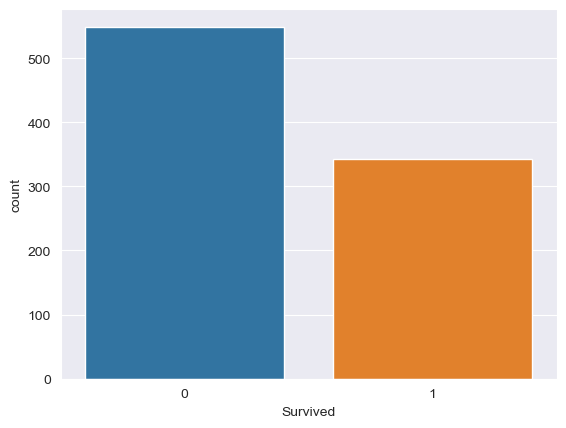

In [5]:
sns.countplot(data=df,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

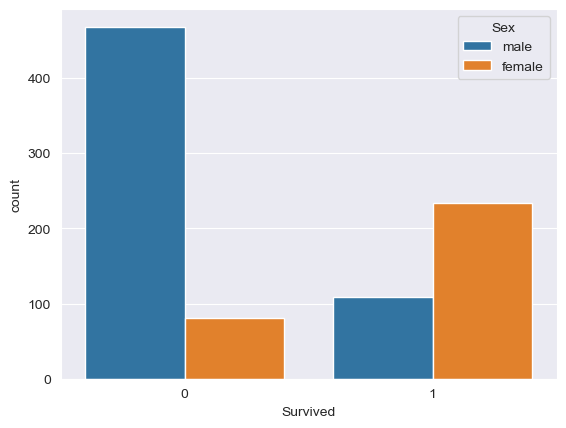

In [6]:
sns.countplot(data=df,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

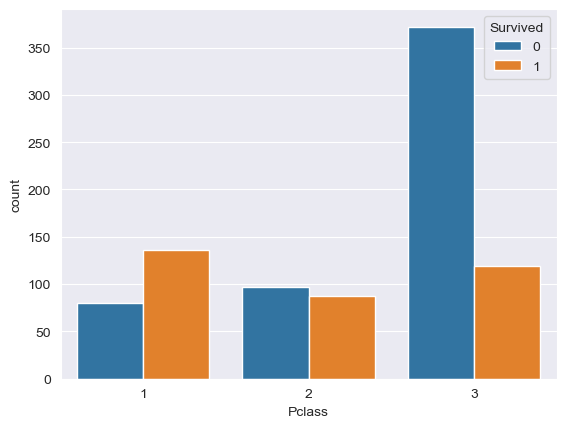

In [7]:
sns.countplot(data=df,x='Pclass',hue='Survived')

Missing data

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df[df['Age'].isna()]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

Correlation

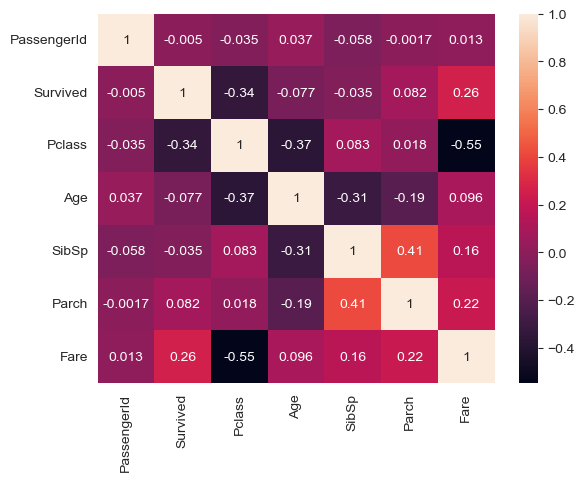

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

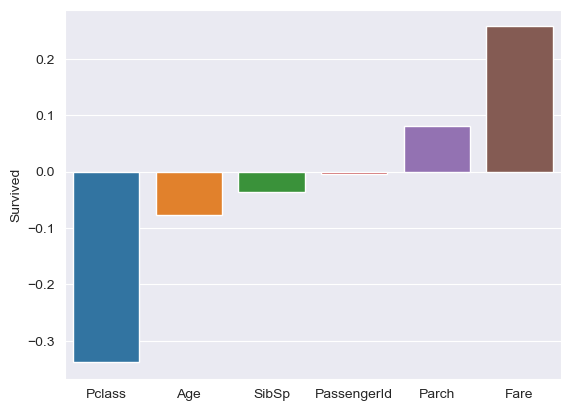

In [11]:
data_corr = df.corr()['Survived'].sort_values()
data_corr
sns.barplot(y=data_corr[:-1],x=data_corr.index[:-1])
plt.show()

Filling missing age with mean value of age

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

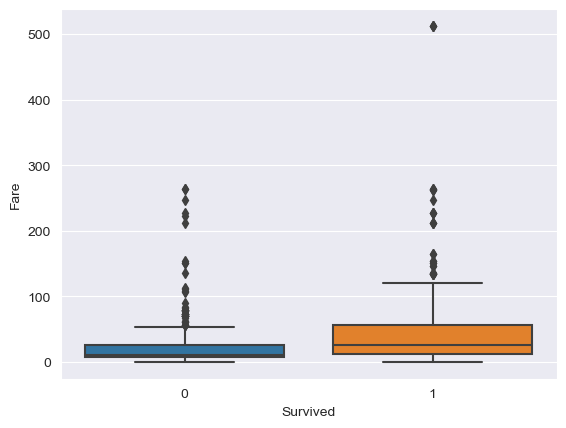

In [14]:
sns.boxplot(data=df,x='Survived',y='Fare')
plt.show()

dropping outlier

In [15]:
df.drop(df[df['Fare'] > 400].index,axis=0,inplace=True)

In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

If cabin is null mean of fare is very low so i will put the cabin class as the lower one

In [17]:
df[df['Cabin'].isna()]['Fare'].mean()

18.438415889212813

In [18]:
df['Cabin'].str.get(0).value_counts()

C    59
B    45
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

Taking 1st letter of cabin as class of the cabin

In [19]:
df['Cabin_class'] = df['Cabin'].apply(lambda x:x[0] if pd.notnull(x) else 'X')

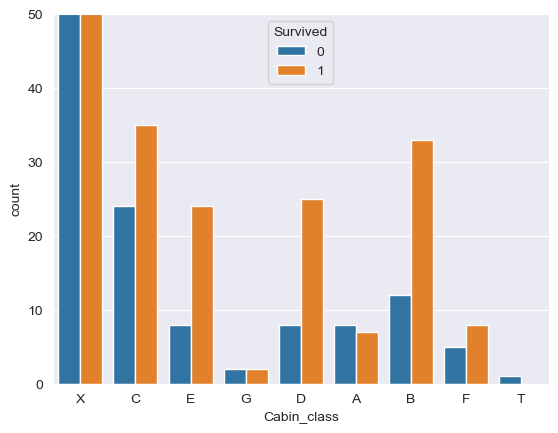

In [20]:
sns.countplot(data=df,x='Cabin_class',hue='Survived')
plt.ylim(0,50)
plt.show()

In [21]:
df.groupby(['Pclass','Cabin_class']).size()

Pclass  Cabin_class
1       A               15
        B               45
        C               59
        D               29
        E               25
        T                1
        X               39
2       D                4
        E                4
        F                8
        X              168
3       E                3
        F                5
        G                4
        X              479
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

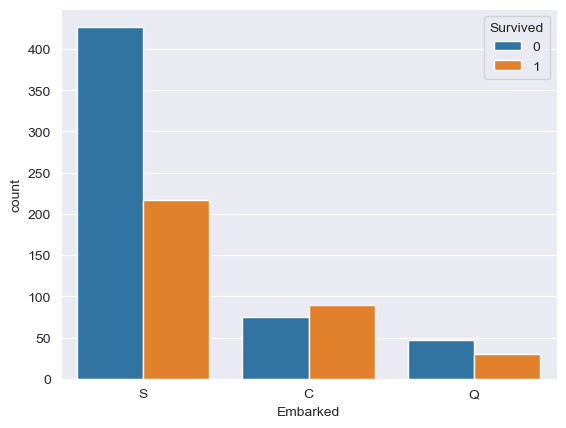

In [22]:
sns.countplot(data=df,x='Embarked',hue='Survived')

dropping more uneccesary data

In [23]:
df = df.drop('Cabin',axis=1)

In [24]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Cabin_class    0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_class    0
dtype: int64

All missing data has been resolved

In [27]:
df = df.set_index('PassengerId')

getting title of a person only 4 most common are taken into consideration, others are labaled as 'other'

In [28]:
df['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

PassengerId
1         Mr
2        Mrs
3       Miss
4        Mrs
5         Mr
       ...  
887      Rev
888     Miss
889     Miss
890       Mr
891       Mr
Name: Name, Length: 886, dtype: object

In [29]:
def get_title(x):
    titles = [' Mr',' Miss',' Mrs',' Master']
    title = x.split(',')[1].split('.')[0]
    if title in titles:
        return title
    else:
        return 'other'

In [30]:
df['Title'] = df['Name'].apply(get_title)
df['Family_size'] = df['Parch'] + df['SibSp']
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_class,Title,Family_size
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,X,Mr,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Mrs,1
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,X,Miss,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,C,Mrs,1
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,X,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,X,other,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,B,Miss,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,X,Miss,3


In [31]:
df = df.drop('Ticket',axis=1)

In [32]:
df = df.drop('Name',axis=1)
df = df.drop(['Parch','SibSp'],axis=1)

In [33]:
df = df.drop(df[df['Cabin_class']=='T'].index,axis=0)

In [34]:
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Cabin_class    0
Title          0
Family_size    0
dtype: int64

In [35]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [36]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [37]:
df_final = pd.concat([df_nums,df_objs],axis=1)

In [38]:
df_final

,Survived,Pclass,Age,Fare,Family_size,Sex_male,Embarked_Q,Embarked_S,Cabin_class_B,Cabin_class_C,Cabin_class_D,Cabin_class_E,Cabin_class_F,Cabin_class_G,Cabin_class_X,Title_ Miss,Title_ Mr,Title_ Mrs,Title_other
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,22.000000,7.2500,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0
2,1,1,38.000000,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,3,26.000000,7.9250,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,1,1,35.000000,53.1000,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
5,0,3,35.000000,8.0500,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,13.0000,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
888,1,1,19.000000,30.0000,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
889,0,3,29.699118,23.4500,3,0,0,1,0,0,0,0,0,0,1,1,0,0,0


<h1>Model SVC</h1>

In [39]:
len(df_final)
df_final.to_csv('train_final.csv',index=True)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
X = df_final.drop('Survived',axis=1)
y = df_final['Survived']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=47)

In [43]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [44]:
from sklearn.svm import SVC

In [45]:
svc_model = SVC(class_weight='balanced')

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [48]:
params = {'C': [0.001, 0.01, 0.1, 0.5, 1, 2,5,10,20,50],
          'kernel': ['linear', 'rbf', 'sigmoid'],
          'gamma': ['scale', 'auto']}
grid_svc_model = GridSearchCV(estimator=svc_model, param_grid=params, verbose=2, cv=5)
grid_svc_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.001, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=0.001, gamma=scale, k

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=2)

In [49]:
grid_svc_model.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [50]:
y_test_pred = grid_svc_model.predict(scaled_X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       113
           1       0.72      0.73      0.73        64

    accuracy                           0.80       177
   macro avg       0.79      0.79      0.79       177
weighted avg       0.80      0.80      0.80       177



In [51]:
confusion_matrix(y_test,y_test_pred)

array([[95, 18],
       [17, 47]], dtype=int64)

In [52]:
from joblib import dump

In [53]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
final_svc_model = SVC(class_weight='balanced',C=5,gamma='auto',kernel='rbf')
final_svc_model.fit(X,y)

SVC(C=5, class_weight='balanced', gamma='auto')

In [55]:
dump(final_svc_model,'final_svc_model.joblib')

['final_svc_model.joblib']

In [56]:
df_final.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Family_size', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Cabin_class_B', 'Cabin_class_C',
       'Cabin_class_D', 'Cabin_class_E', 'Cabin_class_F', 'Cabin_class_G',
       'Cabin_class_X', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs',
       'Title_other'],
      dtype='object')

<h1>Models</h1>

<h1>Knn</h1>

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn_model = KNeighborsClassifier()

In [59]:
params = {'n_neighbors':[x for x in range(1,25,2)],
          'p':[1,2,3,4]}

In [60]:
grid_knn_model = GridSearchCV(estimator=knn_model,param_grid=params)

In [61]:
grid_knn_model.fit(scaled_X_train,y_train)

C:\Users\Michal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Michal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23],
                         'p': [1, 2, 3, 4]})

In [62]:
grid_knn_model.best_params_

{'n_neighbors': 3, 'p': 1}

In [63]:
pred = grid_knn_model.predict(scaled_X_test)

C:\Users\Michal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       113
           1       0.79      0.72      0.75        64

    accuracy                           0.83       177
   macro avg       0.82      0.81      0.81       177
weighted avg       0.83      0.83      0.83       177



In [66]:
confusion_matrix(y_test,y_test_pred)

array([[95, 18],
       [17, 47]], dtype=int64)

In [67]:
final_knn_model = KNeighborsClassifier(n_neighbors=15,p=1)
final_knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=15, p=1)

In [68]:
from joblib import dump

In [69]:
dump(final_knn_model,'final_knn_model.joblib')

['final_knn_model.joblib']

<h1>Logistic Regression</h1>

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
log_model = LogisticRegression(penalty='elasticnet',multi_class='ovr',max_iter=100000,solver='saga')

In [72]:
params = {'C': np.logspace(0, 4, 10),
          'l1_ratio': [.1, .5, .7,.9, .95, .99, 1]}
grid_log_model = GridSearchCV(estimator=log_model,param_grid=params,verbose=2)

In [73]:
grid_log_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END ................................C=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=1.0, l1_ratio=0.7; total time=   0.0s
[CV] END ................................C=1.0,

GridSearchCV(estimator=LogisticRegression(max_iter=100000, multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             verbose=2)

In [74]:
grid_log_model.best_params_

{'C': 2.7825594022071245, 'l1_ratio': 0.99}

In [75]:
log_pred = grid_log_model.predict(scaled_X_test)

In [76]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       113
           1       0.73      0.72      0.72        64

    accuracy                           0.80       177
   macro avg       0.79      0.78      0.79       177
weighted avg       0.80      0.80      0.80       177



In [77]:
confusion_matrix(y_test,log_pred)

array([[96, 17],
       [18, 46]], dtype=int64)

In [78]:
final_log_model = LogisticRegression(penalty='elasticnet',multi_class='ovr',max_iter=100000,solver='saga',l1_ratio=0.95,C=1)

In [79]:
final_log_model.fit(X,y)

LogisticRegression(C=1, l1_ratio=0.95, max_iter=100000, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

In [80]:
dump(final_log_model,'final_log_model.joblib')

['final_log_model.joblib']

<h1>Ensemble</h1>

In [81]:
from sklearn.ensemble import VotingClassifier

In [82]:
grid_svc_model.score(scaled_X_test,y_test)

0.8022598870056498

In [83]:
grid_knn_model.score(scaled_X_test,y_test)


C:\Users\Michal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8305084745762712

In [84]:
grid_log_model.score(scaled_X_test,y_test)

0.8022598870056498

In [85]:
svc_best = grid_svc_model.best_estimator_

In [86]:
log_best = grid_log_model.best_estimator_

In [87]:
knn_best = grid_knn_model.best_estimator_

In [88]:
estimators=[('knn', knn_best), ('svc', svc_best), ('log_best', log_best)]

In [89]:
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(scaled_X_train,y_train)
ensemble.score(scaled_X_test,y_test)

C:\Users\Michal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7966101694915254

In [90]:
ensemble.fit(X,y)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3, p=1)),
                             ('svc', SVC(C=10, class_weight='balanced')),
                             ('log_best',
                              LogisticRegression(C=2.7825594022071245,
                                                 l1_ratio=0.99, max_iter=100000,
                                                 multi_class='ovr',
                                                 penalty='elasticnet',
                                                 solver='saga'))])

In [91]:
dump(ensemble,'final_ensemble_model.joblib')

['final_ensemble_model.joblib']

<h1>Model with the best score is model using k-nearest neighbors algorithm</h1>